---
# 1. Project Overview 
---

# Company Bankruptcy Prediction - Part 1  
## Project Overview  

This project explores financial ratios and corporate governance indicators to predict company bankruptcy. The dataset, sourced from the **Taiwan Economic Journal (1999-2009)**, includes **96 financial attributes**, providing valuable insights into firms' financial health. The dataset is publicly available on **Kaggle**: [Company Bankruptcy Prediction - Kaggle (Fedesoriano)](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction).  


### Objective  
- Analyze **key financial ratios** affecting corporate bankruptcy.  
- Conduct **Exploratory Data Analysis (EDA)** to identify patterns and correlations.  
- Prepare the dataset for **machine learning modeling** in the second phase.

## Structure of Part 1  
1️- **Project Overview** → Context and motivation for the study.  
2- **Dataset Download & Loading** → Sources and data acquisition.  
3- **Dataset Characteristics** → Understanding structure, attributes, and class imbalance.  
4- **Exploratory Data Analysis (EDA)** → Visualizing distributions, correlations, and financial indicators.  

## Technologies & Tools  
- **Programming:** Python (Pandas, NumPy, Scikit-learn)  
- **Data Visualization:** Matplotlib, Seaborn  
- **Statistical Analysis:** Correlation matrices, boxplots, pairplots  

---
# 2. Dataset Download & Loading 
---

## 🔧 Setup  

For this project, we will be using the following Python libraries:  

- **pandas** → Data manipulation and analysis, essential for handling structured datasets.  
- **numpy** → Numerical computing, used for efficient mathematical operations.  
- **matplotlib** → Core visualization library for creating static plots and graphs.  
- **seaborn** → Statistical data visualization, used for creating enhanced plots and correlation analysis.  
- **sklearn.preprocessing (MinMaxScaler, StandardScaler)** → Feature scaling techniques for normalizing financial ratios.  
- **sklearn.decomposition (PCA)** → Dimensionality reduction to extract key features from high-dimensional data.  
- **sklearn.ensemble (RandomForestClassifier)** → Machine learning model to evaluate feature importance and predict bankruptcy risk.  

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

## Downloading the Dataset  

To begin this project, we first need to load the **Company Bankruptcy Prediction** dataset. The dataset is stored in a CSV file and can be read using `pandas`. 

In [6]:
df = pd.read_csv("Company_Bankruptcy_Prediction.csv")

---
# 3. Dataset Characteristics 
---

In [9]:
# Check if data are numerical or categorical and if we have missing information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Dataset Characteristics  

The dataset consists of **6819 entries** and **96 columns**, representing different financial and operational indicators. Here are its key characteristics:  

**All features are numerical** (`float64` or `int64`).  
**No missing values** – all columns contain **6819 non-null values**.  
**Target variable (`Y`)**: `Bankrupt?` (1 = Bankrupt, 0 = Not Bankrupt).  
**93 features (`float64`)**: Various financial ratios and performance metrics.  

### Feature Types:  
- **Profitability ratios**: ROA, ROE, profit margins.  
- **Liquidity ratios**: Current ratio, quick ratio.  
- **Leverage indicators**: Debt ratio, equity-to-liability ratio.  
- **Operational efficiency metrics**: Asset turnover, cash flow ratios.  

### Categorical Flags (`int64`):  
- **`X0 - Bankrupt?`** → Bankruptcy status (1 = Bankrupt, 0 = Not Bankrupt).  
- **`X85 - Liability-Assets Flag`** → 1 if Total Liability exceeds Total Assets, 0 otherwise.  
- **`X94 - Net Income Flag`** → 1 if Net Income is Negative for the last two years, 0 otherwise.  

This dataset is already **clean and complete**, meaning no imputation for missing values is needed. The next step involves **exploratory data analysis (EDA)** to understand patterns and relationships among financial variables.

In [12]:
# Checking Nan presence

#bank_data.isna().sum().max()
[print(col) for col in df if df[col].isna().sum() > 0 ]

[]

In [14]:
# Check for duplicate rows in the dataset
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


In [16]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

### Bankruptcy Distribution  

The distribution of the target variable is as follows:  

- **Bankrupt companies (`1`)**: **220**  
- **Non-bankrupt companies (`0`)**: **6599**  
- **Bankrupt ratio**: **~3.2%** of total data  

This distribution reflects the dataset's composition, where the majority of companies are categorized as **non-bankrupt**, while a smaller proportion is labeled as **bankrupt**.


In [19]:
# Count the number of bankrupt (1) and non-bankrupt (0) companies
print(df['Bankrupt?'].value_counts())
print('-'* 30)
print( f"Bankrupt ratio: {round(len(df[df["Bankrupt?"] == 1]) / len(df["Bankrupt?"])*100,1)}%" )  # Bankruptcy ratio

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
------------------------------
Bankrupt ratio: 3.2%


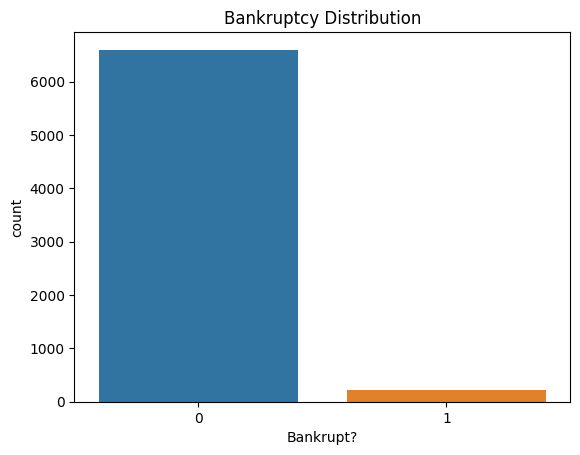

In [21]:
# Countplot for bankruptcy distribution with color adjustment
sns.countplot(x="Bankrupt?", data=df, hue="Bankrupt?", legend=False)
plt.title("Bankruptcy Distribution")
plt.show()

---
# 4. Exploratory Data Analysis (EDA) 
---

In [23]:
# Summary statistics of the dataset
df.describe().T  # Transposed for better readability

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


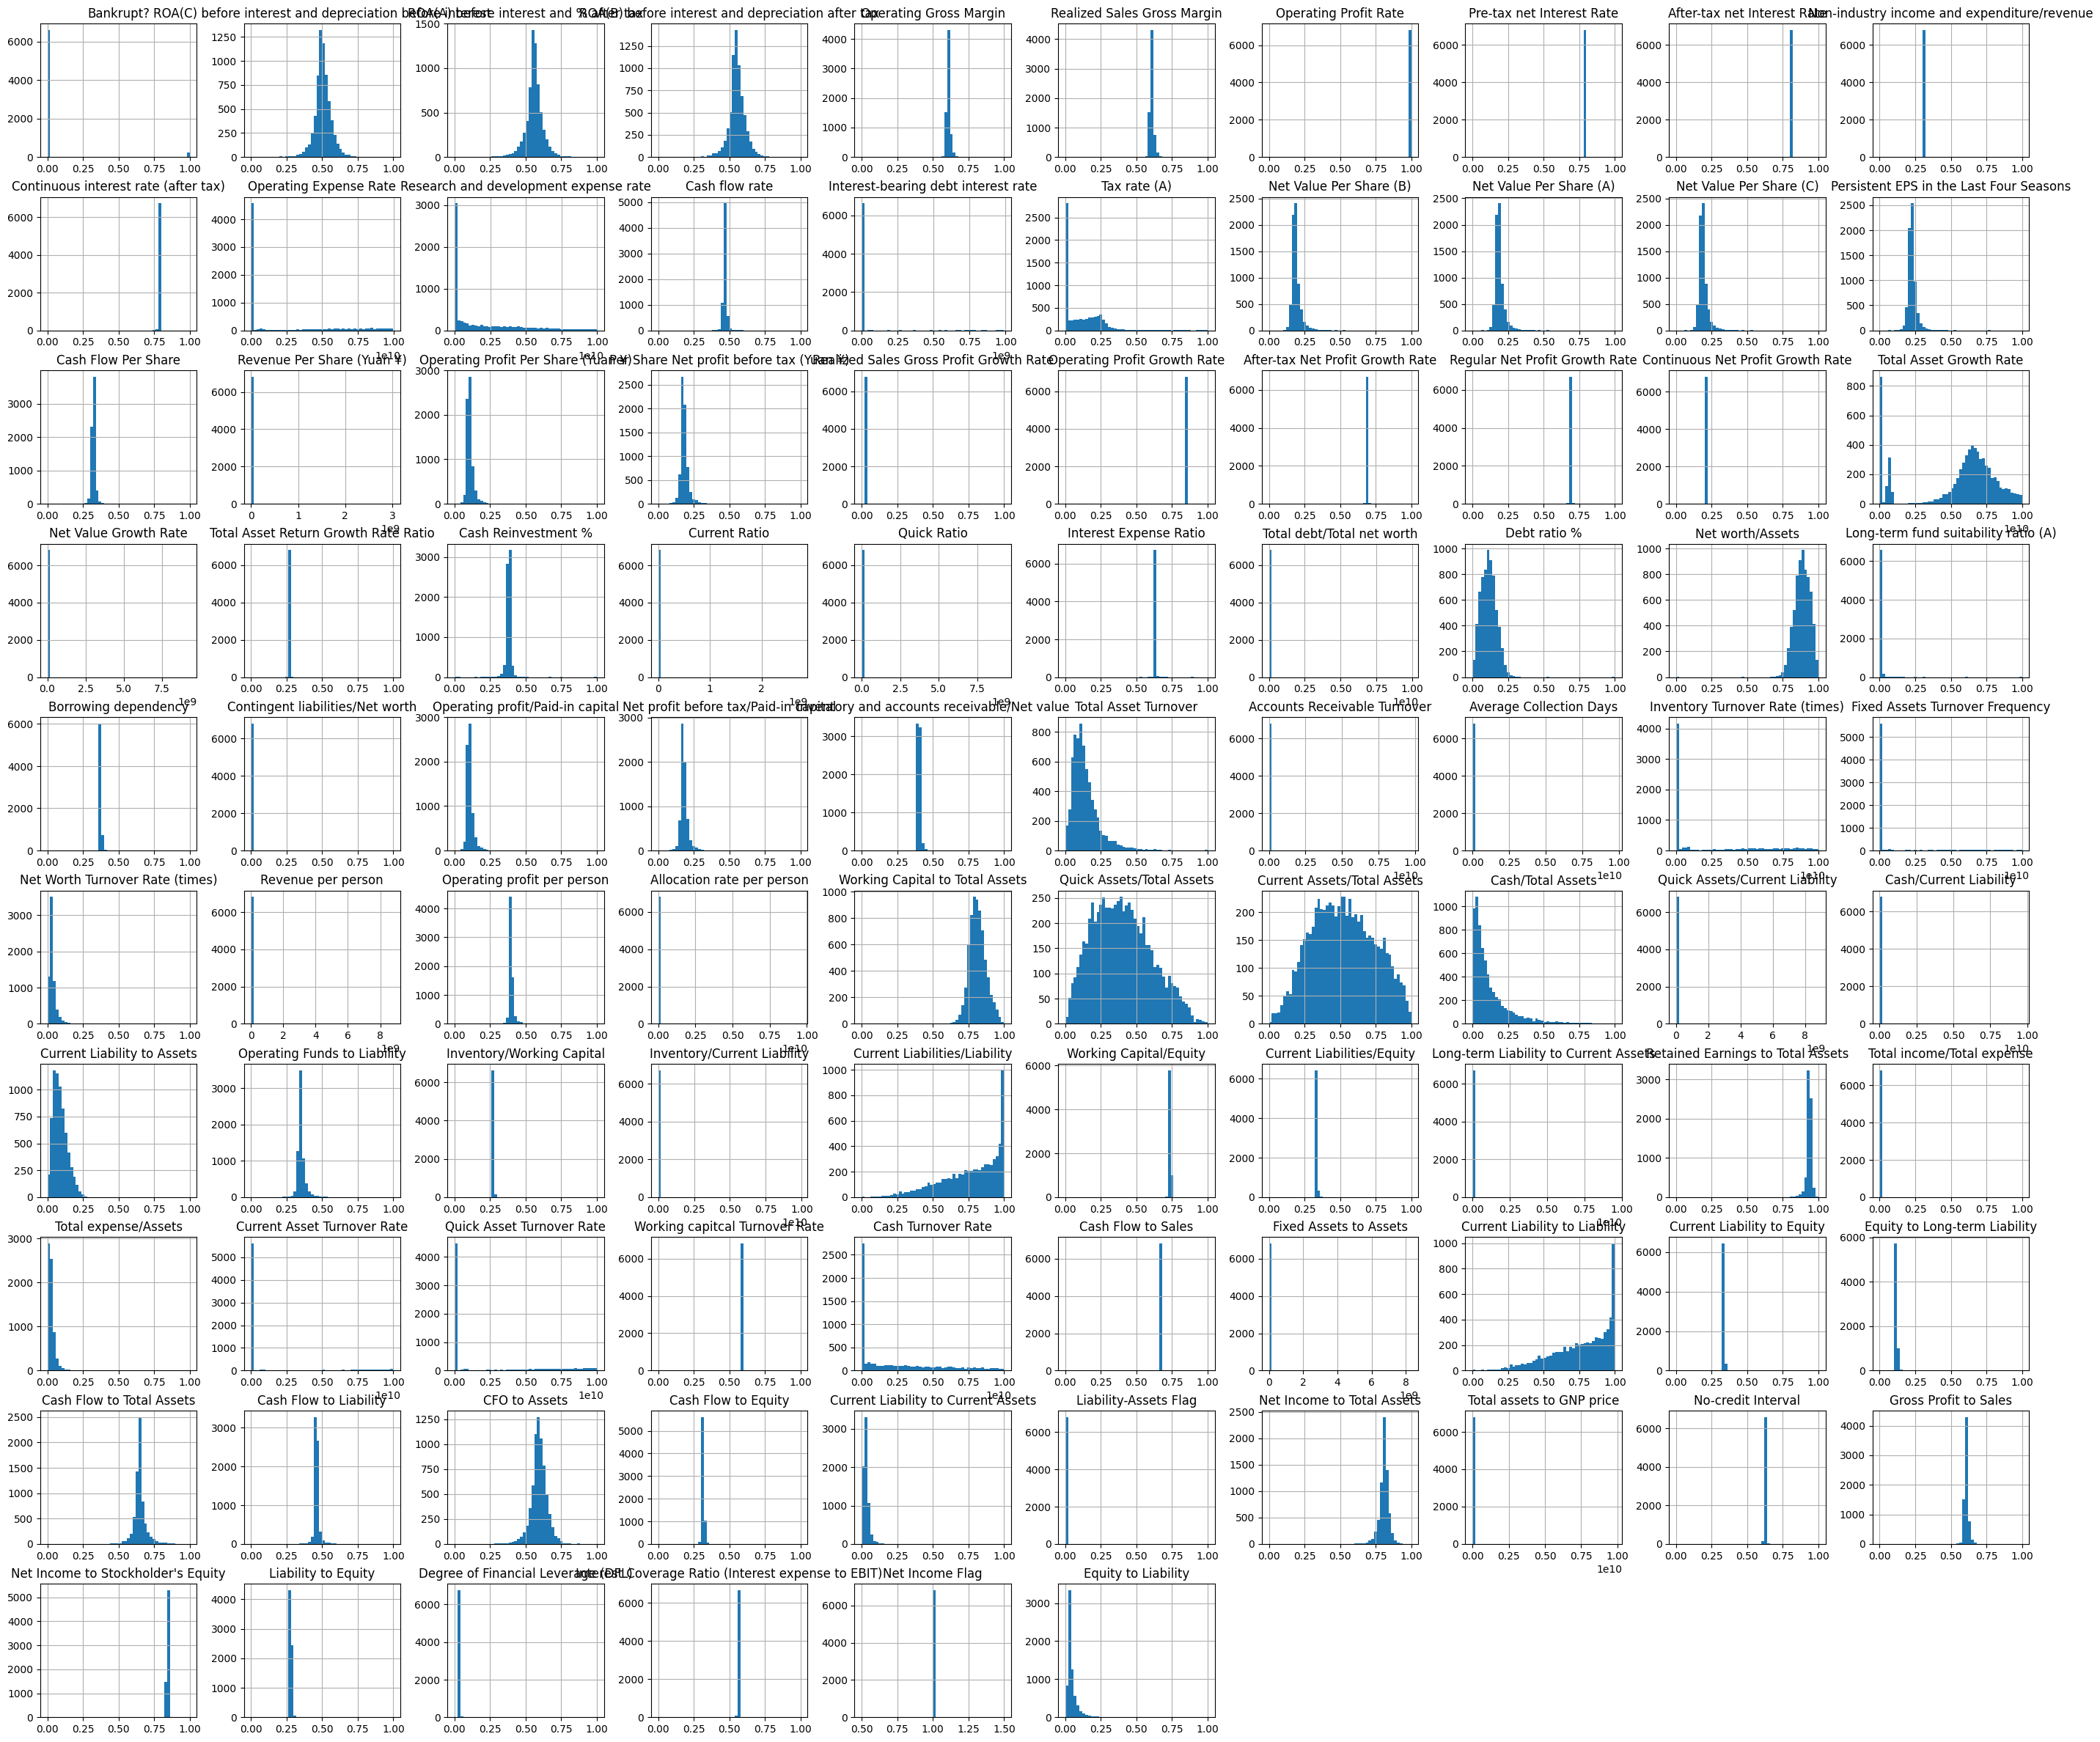

In [25]:
# histograms of numerical data
df.hist(figsize = (35,30), bins = 50)
plt.show()

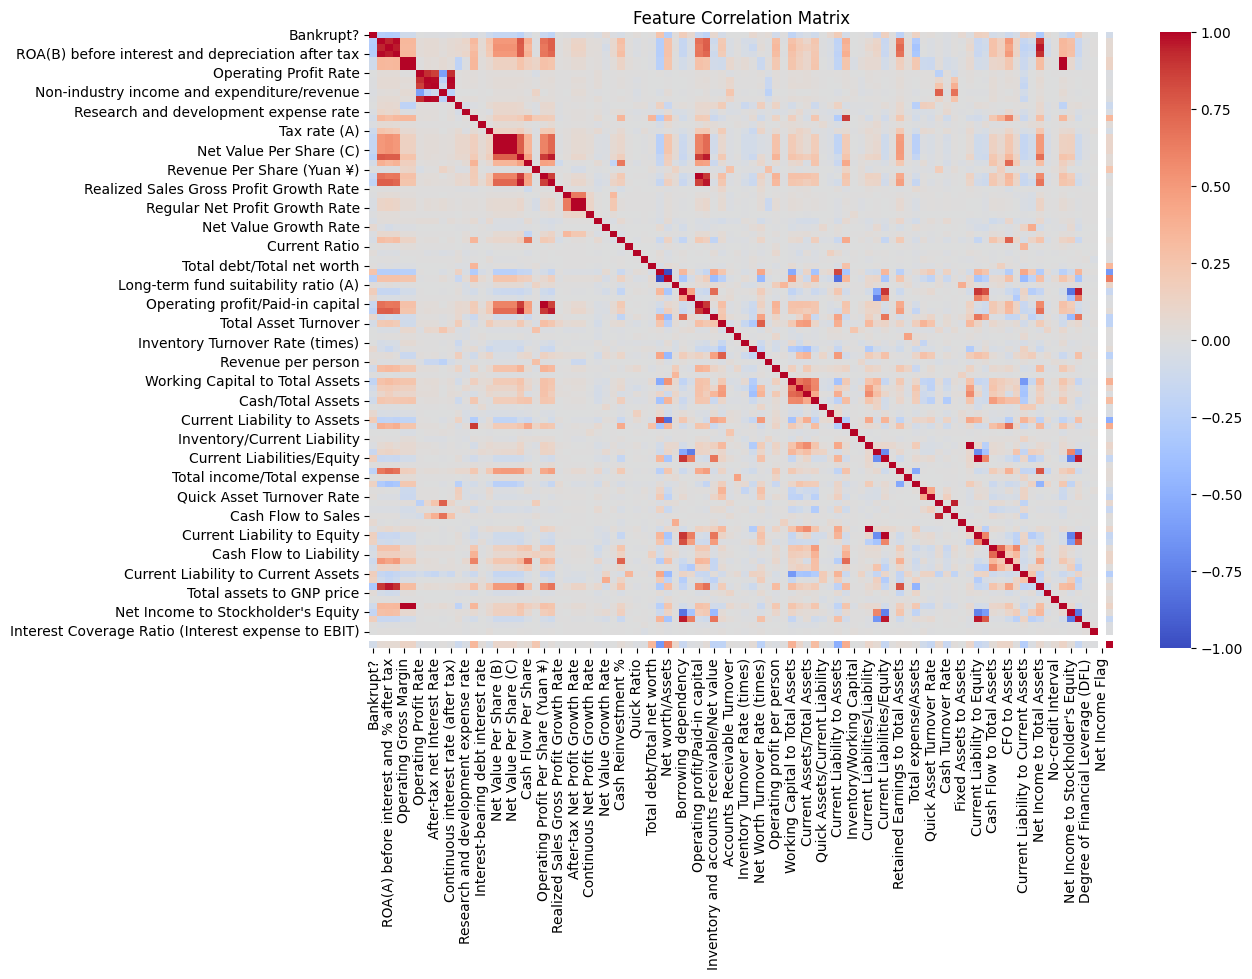

In [27]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

## Identifying Highly Correlated Features

In [29]:
# Compute correlation of all features with the target variable "Bankrupt?"
target_correlation = df.corr()["Bankrupt?"].sort_values()

# Extract top 10 positive correlations
top_positive_correlations = target_correlation.tail(10)  # Last 10 values (highest positive correlations)

# Extract top 10 negative correlations
top_negative_correlations = target_correlation.head(10)  # First 10 values (most negative correlations)

# Display results
print("\nTop 10 most positively correlated features with 'Bankrupt?':")
print(top_positive_correlations)

print("\nTop 10 most negatively correlated features with 'Bankrupt?':")
print(top_negative_correlations)


Top 10 most positively correlated features with 'Bankrupt?':
Liability-Assets Flag                  0.139212
Current Liabilities/Equity             0.153828
Current Liability to Equity            0.153828
Liability to Equity                    0.166812
Current Liability to Current Assets    0.171306
Borrowing dependency                   0.176543
Current Liability to Assets            0.194494
Debt ratio %                           0.250161
Bankrupt?                              1.000000
Net Income Flag                             NaN
Name: Bankrupt?, dtype: float64

Top 10 most negatively correlated features with 'Bankrupt?':
Net Income to Total Assets                                -0.315457
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
ROA(C) before interest and depreciation before interest   -0.260807
Net worth/Assets                                          -0.250161
Persistent EPS in the La

## Analysis of Highly Correlated Features with Bankruptcy

### Positively Correlated Features
The features with the highest positive correlation with bankruptcy indicate financial stress, particularly related to **liabilities and debt management**:
- **Liability-Assets Flag (0.139)**: A company with total liabilities exceeding its assets.
- **Current Liability to Equity (0.154)** and **Liability to Equity (0.167)**: High values suggest excessive leverage, increasing bankruptcy risk.
- **Debt Ratio % (0.250)**: A stronger correlation, showing that companies with higher debt ratios are more likely to go bankrupt.
- **Borrowing Dependency (0.177)**: Suggests that companies heavily reliant on borrowed funds have a higher risk of failure.

### Negatively Correlated Features
The top negatively correlated features highlight financial **stability, profitability, and retained earnings**:
- **Net Income to Total Assets (-0.315)**: Companies with higher returns on assets are less likely to go bankrupt.
- **ROA (A, B, C) (-0.28 to -0.26)**: Return on assets before and after interest/tax shows a strong negative correlation, emphasizing profitability as a key stability factor.
- **Persistent EPS (-0.22)** and **Retained Earnings to Total Assets (-0.218)**: Higher earnings retention is linked to lower bankruptcy probability.

### Key Takeaways
- Companies with high debt ratios and liabilities relative to equity tend to have a higher probability of bankruptcy.
- Profitability metrics such as **ROA and Net Income to Total Assets** show a strong negative correlation, indicating that **more profitable firms are significantly less likely to fail**.
- Retained earnings and **sustained earnings per share (EPS)** are crucial factors in financial stability.

This correlation analysis helps identify **the most relevant financial indicators** to assess bankruptcy risk, supporting the selection of features for predictive modeling.


### Boxplots

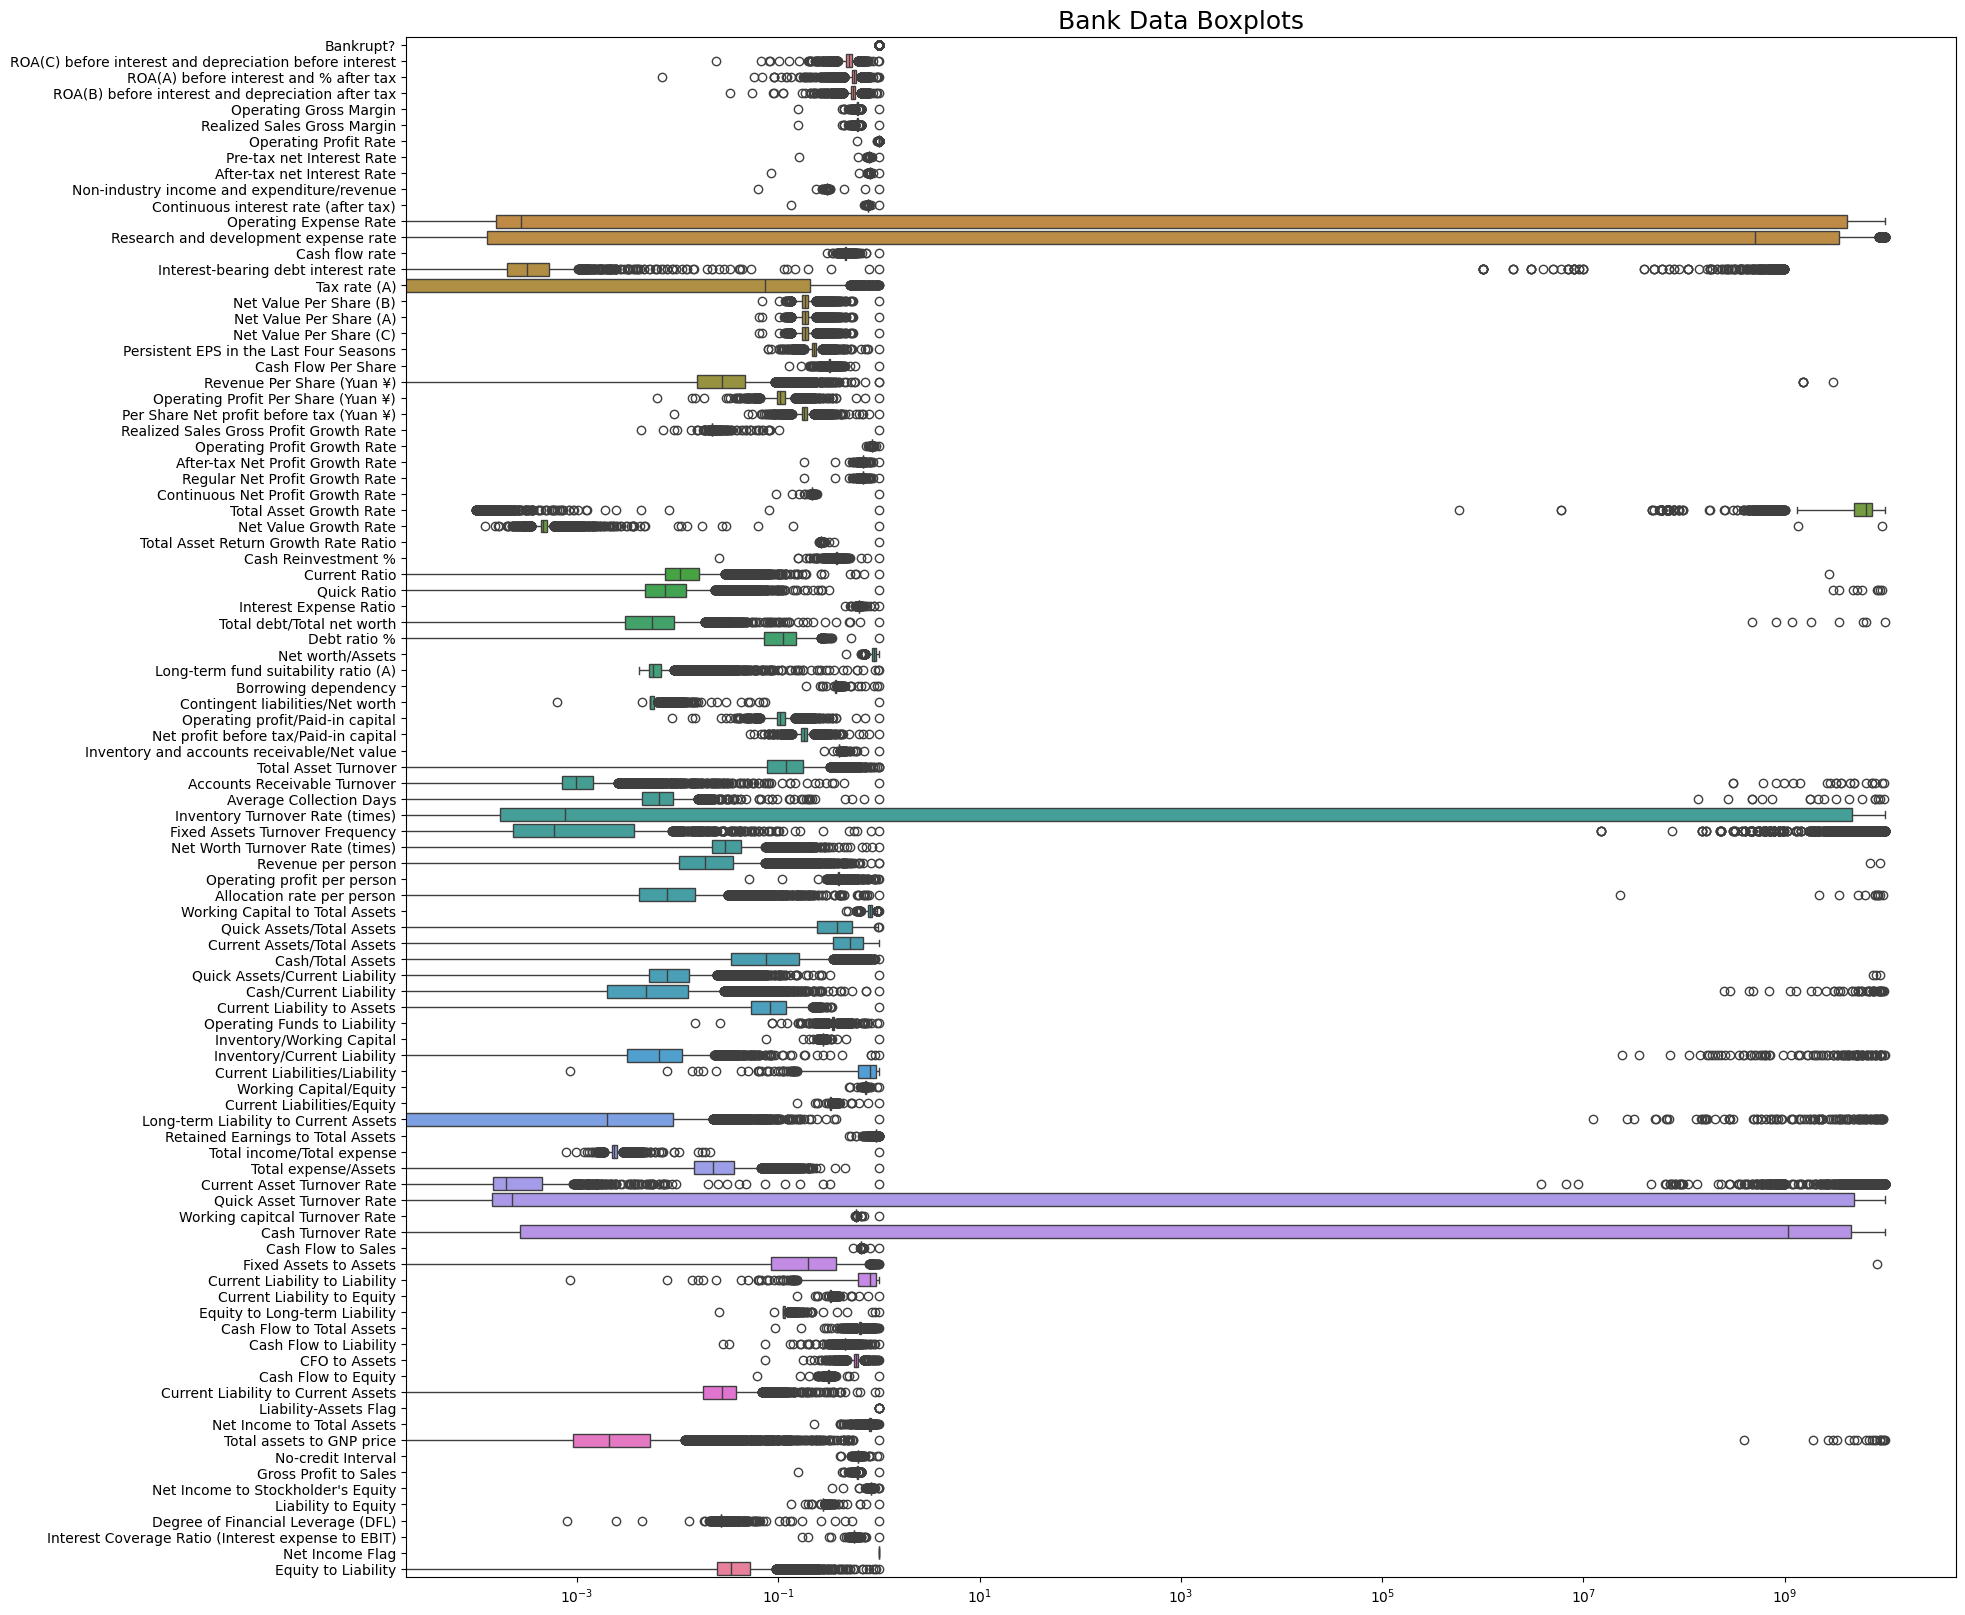

In [32]:
# Boxplot to identify outliers in numerical features
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

## Boxplot Interpretation  

- Variables close to zero have low variability, meaning most values are concentrated around zero.  
  - Possible explanation: Some financial metrics tend to remain close to zero for most companies.  
- Many black dots above indicate outliers, representing extreme values in some financial indicators.  
- The presence of many outliers suggests that some companies have very different financial characteristics compared to the majority.  

### Next Steps:  
- Consider **normalization** (log-transform, Min-Max scaling).  
- Analyze **individual variables** to check if extreme values are meaningful.  
- Evaluate whether **outlier removal** is necessary for modeling.  

### Boxplot and Outliers Analysis

In [35]:
# Assuming df["price"] already exists
Q1 = df["Debt ratio %"].quantile(0.25)  # First quartile (25%)
Q3 = df["Debt ratio %"].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1                    # Interquartile range (IQR)
lower_whisker = max(0, Q1 - 1.5 * IQR)   # Lower whisker (boundary for non-outliers)
upper_whisker = Q3 + 1.5 * IQR           # Upper whisker (boundary for non-outliers)
price_null = df["Debt ratio %"].isnull().sum()  # Count of missing values in "price"
median = df["Debt ratio %"].median()

# Counting the number of units in each range
outliers_lower = len(df[df["Debt ratio %"] < lower_whisker])  # Lower outliers
lower_whisker_units = len(df[(df["Debt ratio %"] >= lower_whisker) & (df["Debt ratio %"] < Q1)])  # Values between lower whisker and Q1
units_q1 = len(df[(df["Debt ratio %"] >= Q1) & (df["Debt ratio %"] < df["Debt ratio %"].median())])  # Values between Q1 and median
units_median = len(df[df["Debt ratio %"] == df["Debt ratio %"].median()])  # Values equal to the median
units_q3 = len(df[(df["Debt ratio %"] > df["Debt ratio %"].median()) & (df["Debt ratio %"] <= Q3)])  # Values between median and Q3
upper_whisker_units = len(df[(df["Debt ratio %"] > Q3) & (df["Debt ratio %"] <= upper_whisker)])  # Values between Q3 and upper whisker
outliers_upper = len(df[df["Debt ratio %"] > upper_whisker])  # Upper outliers

# Creating a DataFrame with statistics and unit counts
quartile_df = pd.DataFrame({
    "Statistic": [
        "Lower Whisker", "Q1 (25%)", "Median (50%)", "Q3 (75%)", 
        "Upper Whisker", "Lower Outliers", "Upper Outliers", "Missing Values"
    ],
    "Value": [
        lower_whisker, Q1, median, Q3, 
        upper_whisker, "-", "-", "-"
    ],
    "Units": [
        lower_whisker_units, units_q1, units_median, units_q3, 
        upper_whisker_units, outliers_lower, outliers_upper, price_null
    ]
})

# Adding a cumulative sum column
quartile_df["Cumulative Sum"] = quartile_df["Units"].cumsum()
quartile_df

,Statistic,Value,Units,Cumulative Sum
0,Lower Whisker,0,1704,1704
1,Q1 (25%),0.072891,1704,3408
2,Median (50%),0.111407,2,3410
3,Q3 (75%),0.148804,1704,5114
4,Upper Whisker,0.262675,1675,6789
5,Lower Outliers,-,0,6789
6,Upper Outliers,-,30,6819
7,Missing Values,-,0,6819


In [37]:
def outliers_analysis(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))
    print('-' * 65)
    
    return dataset

for col in df:
    new_df = outliers_analysis(df[col],str(col),df)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
ROA(A) before interest and % after tax Lower: 0.45512156563454
ROA(A) before interest and % after tax Upper: 0.66957860880942
ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------------

## Normalization 

In [40]:
# Check for values outside the range [0,1] - Normalization 
(df < 0).sum().sum(),(df > 1).sum().sum()

(np.int64(0), np.int64(24940))

In [42]:
# Check for columns outside the range [0,1] - Normalization 
cols_to_normalize = df.columns[(df.max() > 1) | (df.min() < 0)]
cols_to_normalize

Index(['Operating Expense Rate', 'Research and development expense rate',
       'Interest-bearing debt interest rate', 'Revenue Per Share (Yuan ¥)',
       'Total Asset Growth Rate', 'Net Value Growth Rate', 'Current Ratio',
       'Quick Ratio', 'Total debt/Total net worth',
       'Accounts Receivable Turnover', 'Average Collection Days',
       'Inventory Turnover Rate (times)', 'Fixed Assets Turnover Frequency',
       'Revenue per person', 'Allocation rate per person',
       'Quick Assets/Current Liability', 'Cash/Current Liability',
       'Inventory/Current Liability', 'Long-term Liability to Current Assets',
       'Current Asset Turnover Rate', 'Quick Asset Turnover Rate',
       'Cash Turnover Rate', 'Fixed Assets to Assets',
       'Total assets to GNP price'],
      dtype='object')

In [44]:
# Normalize only the necessary columns
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply normalization only to the selected columns that are outside the [0,1] range
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

| Scaler           | Objetivo       | Intervalo                     |
|------------------|----------------|-------------------------------|
| `MinMaxScaler`   | Normalização   |           [0,1]               |
| `StandardScaler` | Padronização   | Média = 0, Desvio Padrão = 1  |


## Profitability and Financial Performance  
🔹 **After-tax Net Interest Rate** → Measures net income relative to sales.  
🔹 **Operating Profit Rate** → Indicates operational efficiency.  
🔹 **Net Income to Total Assets** → Return on Assets (ROA).  
🔹 **Gross Profit to Sales** → Gross profitability from sales.  

**Reason:** These metrics indicate financial health and are used to predict bankruptcies.  

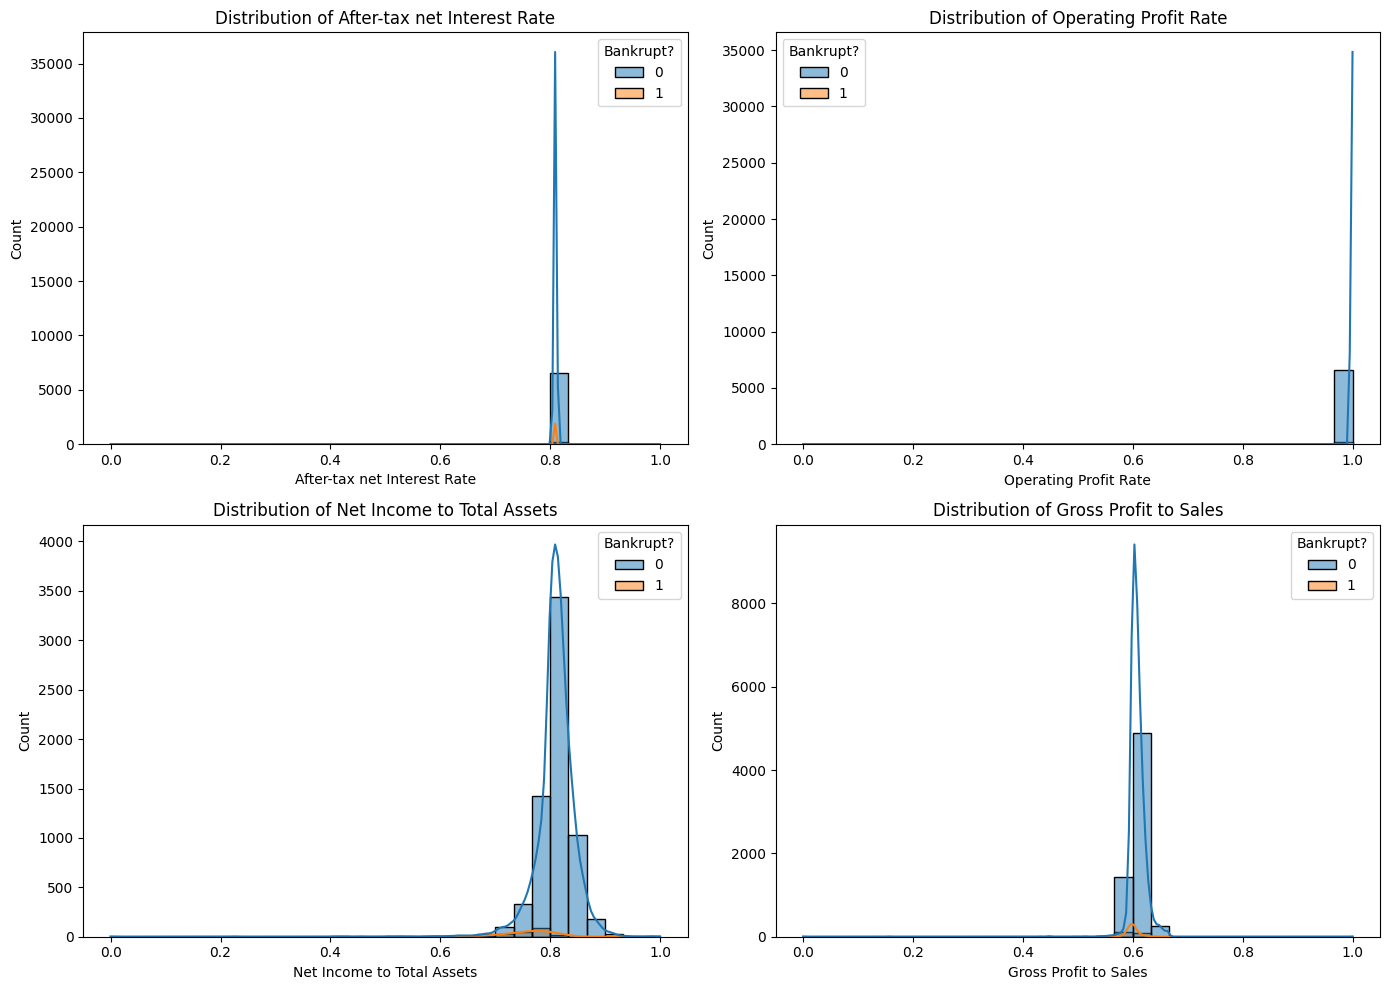

In [47]:
# Profitability and Financial Performance Histogram
features = [
        "After-tax net Interest Rate",
        "Operating Profit Rate",
        "Net Income to Total Assets",
        "Gross Profit to Sales"    ]

# Create a 2x2 subplot (two rows, two columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# Flatten axes to iterate over them easily
axes = axes.flatten()

# Generate histograms for each selected variable
for i, feature in enumerate(features):
    sns.histplot(df, x=feature, hue="Bankrupt?", kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## Interpreting Net Income to Total Assets

### Observations from the Histogram
- The **blue line** (density curve) represents the distribution of **non-bankrupt companies (`Bankrupt?=0`)**.
- The **orange line** represents the distribution of **bankrupt companies (`Bankrupt?=1`)**.
- Most companies have values **clustered around ~0.8**.
- Bankrupt companies (**orange**) are more **spread out**, meaning they have a wider range of values.

### Key Takeaways
- **Non-bankrupt companies** have a **high concentration near 0.8**, indicating most firms maintain **stable profitability**.
- **Bankrupt companies** show a **wider spread**, meaning:
  - Some had **similar profitability to non-bankrupt firms** but still failed (possibly due to liquidity or debt issues).
  - Others had **very low or even negative profitability**, increasing bankruptcy risk.

### How Can We Use This Insight?
- If a company has **Net Income to Total Assets close to 0.8**, it is **more likely to be financially stable**.
- If a company has a **much lower Net Income to Total Assets**, it might be **at higher risk of bankruptcy**.
- However, **other financial indicators** (like liquidity and debt levels) must be considered **together** for a complete bankruptcy prediction.


In [50]:
#print(df["After-tax net Interest Rate"].value_counts())
print(df["Operating Profit Rate"].value_counts())

Operating Profit Rate
0.998987    12
0.998982    11
0.999013    11
0.999038    10
0.999043     9
            ..
0.998777     1
0.999069     1
0.999131     1
0.998874     1
0.998365     1
Name: count, Length: 3376, dtype: int64


## Capital Structure and Debt  
- **Debt ratio %** → Percentage of assets financed by debt.  
- **Total debt/Total net worth** → Total debt-to-equity ratio. 
- **Liability to Equity** → Ratio of liabilities to equity.  
- **Equity to Liability** → Inverse of the previous measure, indicating capital structure.  

**Reason:** Companies with high debt levels may have a higher risk of bankruptcy.  

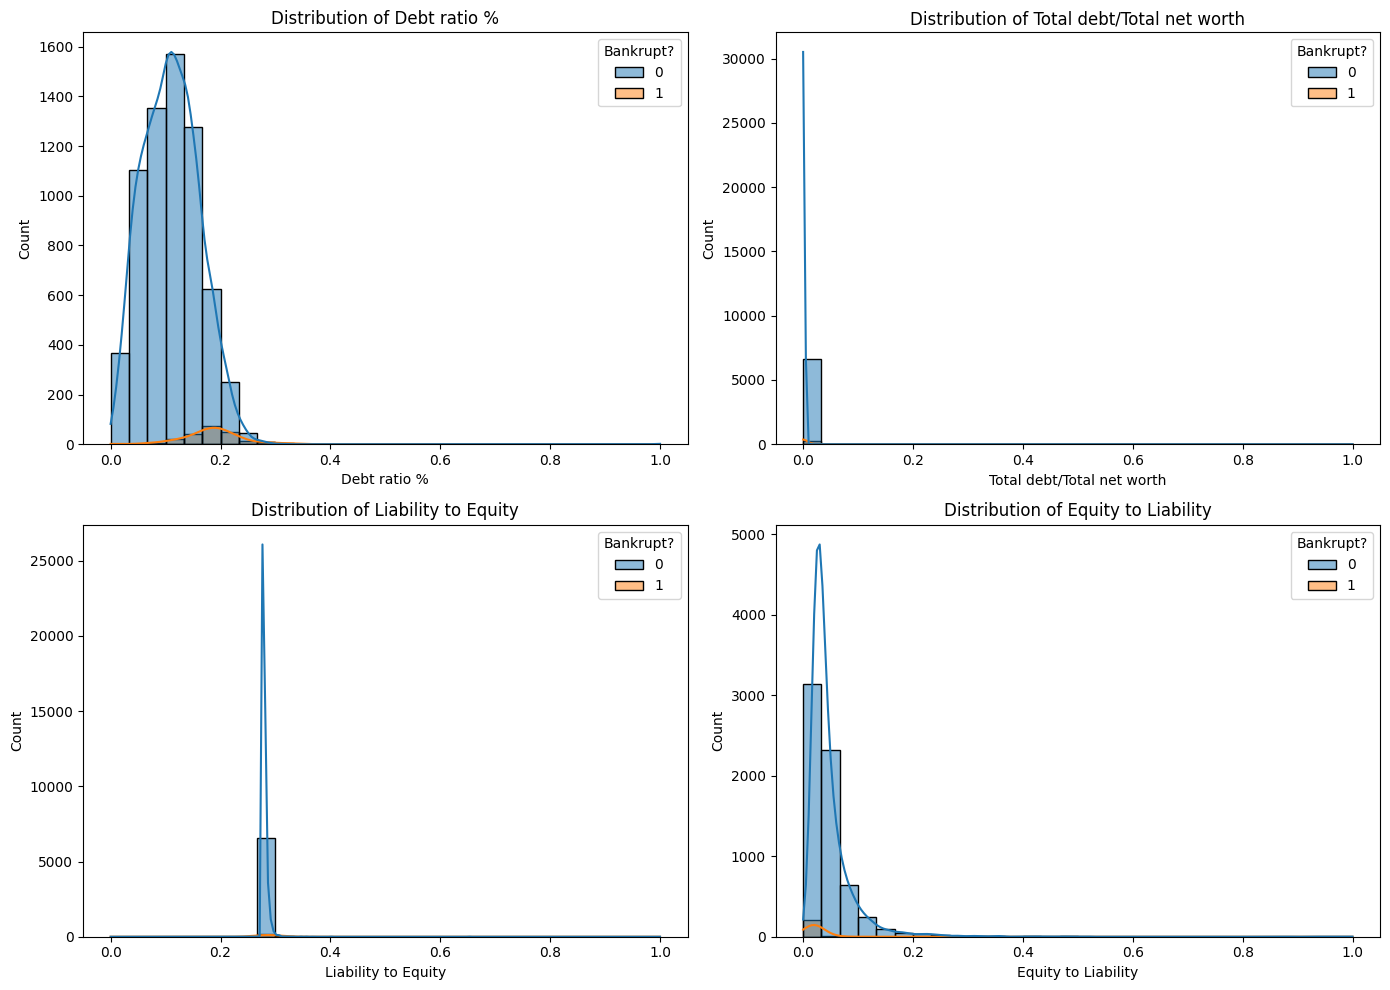

In [53]:
# Capital Structure and Debt
features = [
        "Debt ratio %",
        "Total debt/Total net worth",
        "Liability to Equity",
        "Equity to Liability"    ]

# Create a 2x2 subplot (two rows, two columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# Flatten axes to iterate over them easily
axes = axes.flatten()

# Generate histograms for each selected variable
for i, feature in enumerate(features):
    sns.histplot(df, x=feature, hue="Bankrupt?", kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## Liquidity and Cash Flow  
- **Current Ratio** → Ability to cover short-term liabilities.  
- **Quick Ratio** → More strict liquidity measure (excludes inventory).  
- **Cash Flow to Sales** → Cash flow generated relative to sales.  
- **Cash Flow to Total Assets** → Cash flow relative to total assets.  

**Reason:** Companies with low liquidity may face financial issues before bankruptcy.  

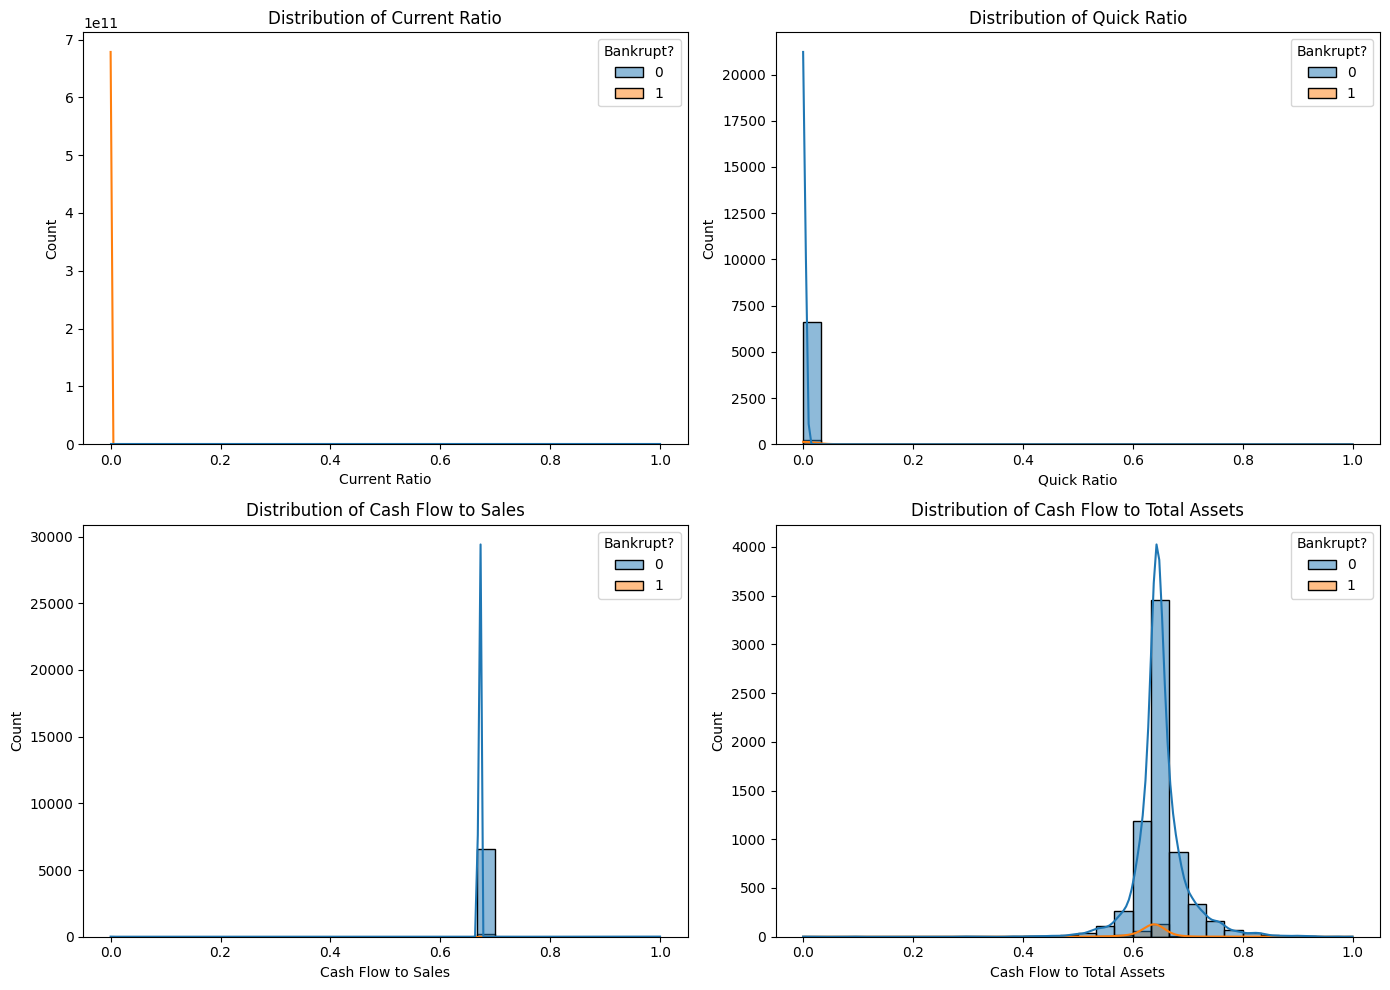

In [56]:
# Liquidity and Cash Flow
features = [
        "Current Ratio",
        "Quick Ratio",
        "Cash Flow to Sales",
        "Cash Flow to Total Assets"    ]

# Create a 2x2 subplot (two rows, two columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# Flatten axes to iterate over them easily
axes = axes.flatten()

# Generate histograms for each selected variable
for i, feature in enumerate(features):
    sns.histplot(df, x=feature, hue="Bankrupt?", kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [58]:
print(df["Current Ratio"].describe())

count    6.819000e+03
mean     1.466491e-04
std      1.210987e-02
min      0.000000e+00
25%      2.747290e-12
50%      3.849882e-12
75%      5.916192e-12
max      1.000000e+00
Name: Current Ratio, dtype: float64


In [60]:
df[df["Current Ratio"] > 0.1]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
2499,0,0.571296,0.635031,0.619573,0.642824,0.642824,0.99965,0.800552,0.812098,0.307626,...,0.857531,1.393092e-12,0.632213,0.642825,0.843386,0.275898,0.026799,0.565194,1,0.089814


## Interpretation of the "Current Ratio" Distribution

### Observations from the Histogram
- The **orange bar** (representing bankrupt companies, `Bankrupt?=1`) is extremely high and concentrated at **0.0**.
- The **blue bars** (non-bankrupt companies, `Bankrupt?=0`) are barely visible, suggesting a **highly imbalanced distribution**.
- The **X-axis is compressed**, showing all values near zero, likely due to **scaling or extreme outliers**.

### Key Takeaways
- **Most bankrupt companies have a Current Ratio of 0**, meaning they likely had **no liquidity** to cover short-term liabilities.
- **Non-bankrupt companies' distribution is unclear**, as most values are **near zero**, which may indicate a **data normalization issue** or that many firms operate with **very low liquidity**.
- **Extreme imbalance in bankrupt companies**, showing that firms with **no short-term liquidity** have a very **high risk of failure**.

## Operational Efficiency  
🔹 **Total Asset Turnover** → Efficiency in using assets to generate sales.  
🔹 **Inventory Turnover Rate (times)** → Speed of inventory turnover.  
🔹 **Accounts Receivable Turnover** → Efficiency in collecting receivables.  
🔹 **Average Collection Days** → Average time to receive payments.  

**Reason:** Companies with poor efficiency may struggle financially.  

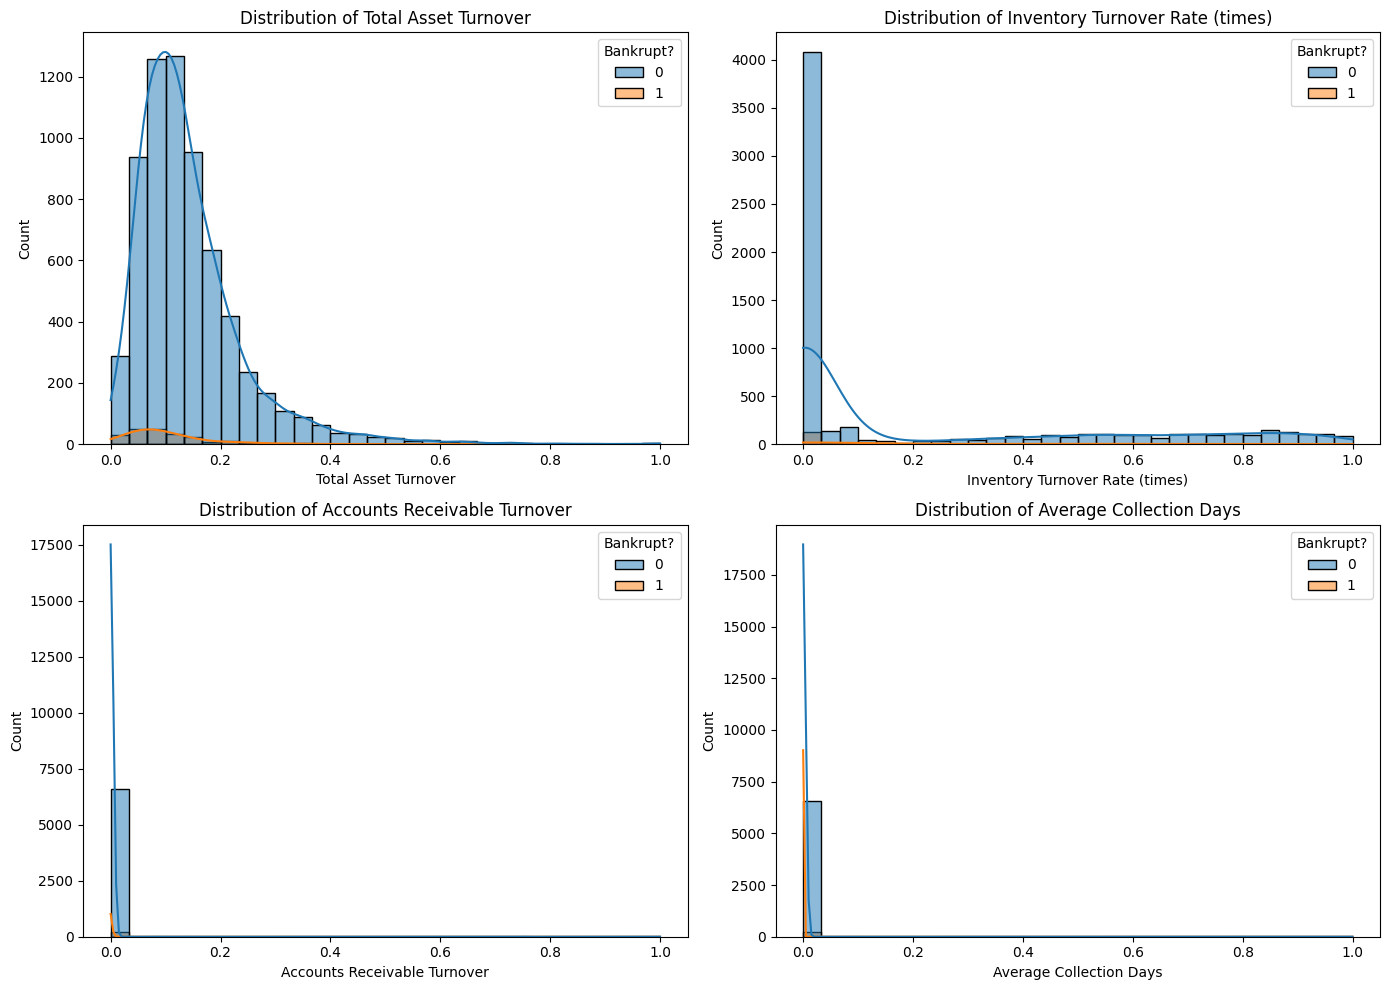

In [65]:
# Operational Efficiency
features = [
        "Total Asset Turnover",
        "Inventory Turnover Rate (times)",
        "Accounts Receivable Turnover",
        "Average Collection Days"    ]

# Create a 2x2 subplot (two rows, two columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# Flatten axes to iterate over them easily
axes = axes.flatten()

# Generate histograms for each selected variable
for i, feature in enumerate(features):
    sns.histplot(df, x=feature, hue="Bankrupt?", kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## Pairplot for Key Features

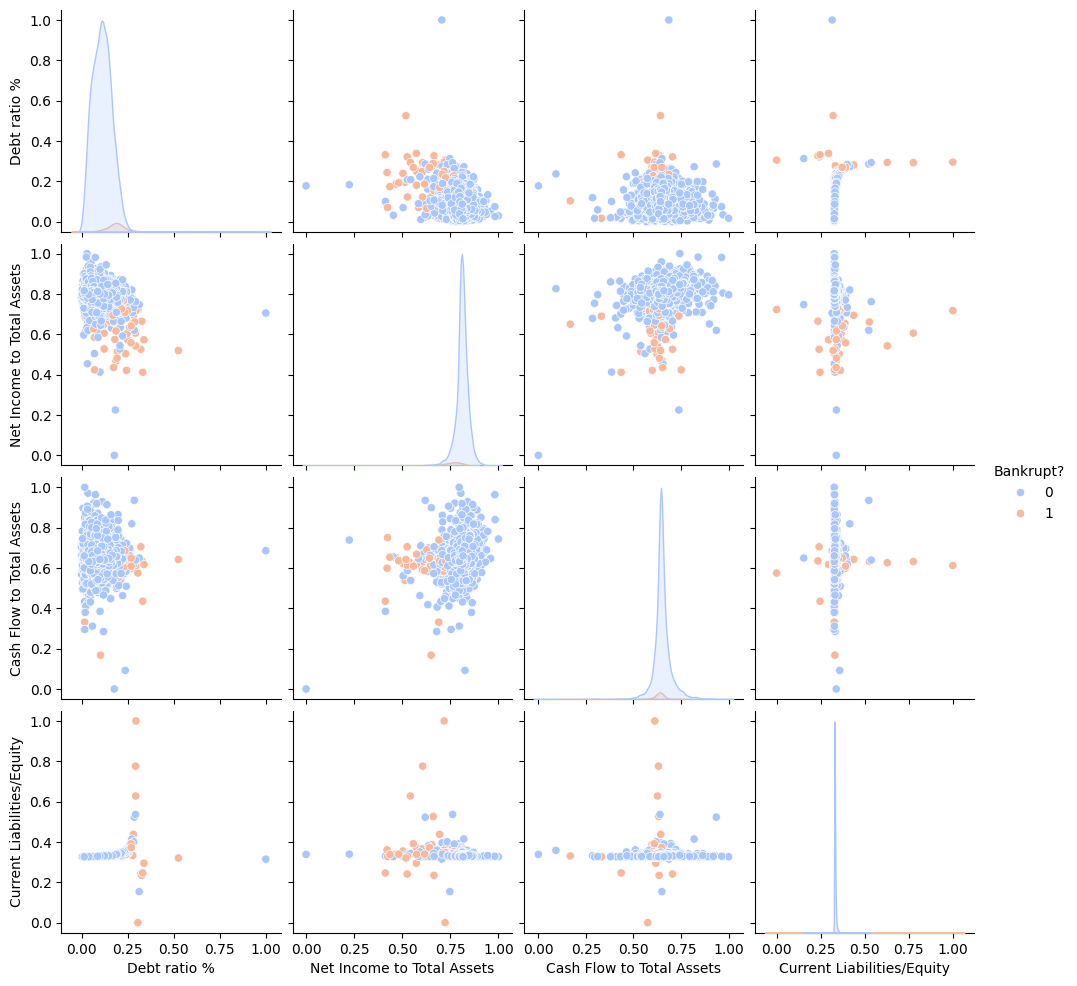

In [67]:
# Select the most representative financial indicators based on correlation
selected_features = [
    "Debt ratio %",                # Solvency Ratios – Measure a company's ability to meet long-term obligations.
    "Net Income to Total Assets",  # Profitability Ratios – Evaluate a company's efficiency in generating profit.
    "Cash Flow to Total Assets",   # Cash Flow Ratios – Relate cash flow to financial obligations.
    "Current Liabilities/Equity"   # Capital Structure Ratios – Indicate leverage and capital structure.
]

# Generate pairplot with bankruptcy hue
sns.pairplot(df, vars=selected_features, hue="Bankrupt?", diag_kind="kde", palette="coolwarm")
plt.show()

## Analysis of the First Row in the Pairplot  

**1️ Debt Ratio % Distribution (First Plot - Diagonal)**  
The first plot represents the **distribution of Debt Ratio %** for both bankrupt and non-bankrupt companies. The density curve shows that **most non-bankrupt firms (blue) have a low Debt Ratio %**, meaning they rely less on debt financing. The bankrupt companies (orange) are more spread out, indicating that some firms failed even with low debt levels, while others had extremely high debt, possibly leading to financial distress.

**2️ Debt Ratio % vs. Net Income to Total Assets (Second Plot)**  
This scatter plot examines the relationship between **Debt Ratio % and Net Income to Total Assets**. We observe that most non-bankrupt companies cluster at lower debt levels with **positive net income**, confirming that financially stable firms tend to have manageable debt. Meanwhile, some bankrupt firms show **negative net income and high debt**, reinforcing the idea that excessive debt combined with poor profitability increases the likelihood of bankruptcy.

**3️ Debt Ratio % vs. Cash Flow to Total Assets (Third Plot)**  
Here, we compare **Debt Ratio % and Cash Flow to Total Assets**. The majority of companies with low debt ratios appear to have **positive cash flows**, which is a good indicator of financial health. In contrast, bankrupt firms show more variation, with some maintaining positive cash flows despite high debt, while others have **both high debt and negative cash flows**, which is a critical warning sign for financial instability.

**4️ Debt Ratio % vs. Current Liabilities/Equity (Fourth Plot)**  
This plot explores the relationship between **Debt Ratio % and Current Liabilities/Equity**. We notice that non-bankrupt firms maintain a **low ratio of current liabilities to equity**, suggesting they are less dependent on short-term financing. However, many bankrupt firms have a **high Current Liabilities/Equity ratio**, implying they relied heavily on short-term liabilities, making them more vulnerable to liquidity crises.

**Key Takeaways**  
- **Most non-bankrupt companies have a low Debt Ratio %**, indicating that maintaining a balanced capital structure is a sign of financial health.  
- **Some bankrupt companies had both low and high Debt Ratios**, meaning that debt alone is not the only predictor of failure.  
- **When high Debt Ratio % is combined with negative net income or poor cash flow, the bankruptcy risk increases significantly.**  
- **Short-term debt (Current Liabilities/Equity) also plays a role**—firms with excessive short-term liabilities relative to equity appear more financially fragile.  

This analysis suggests that while **Debt Ratio % alone does not fully explain bankruptcy risk, it becomes a key factor when combined with profitability, cash flow, and short-term debt indicators.**


## Boxplots of Key Features by Bankruptcy Status

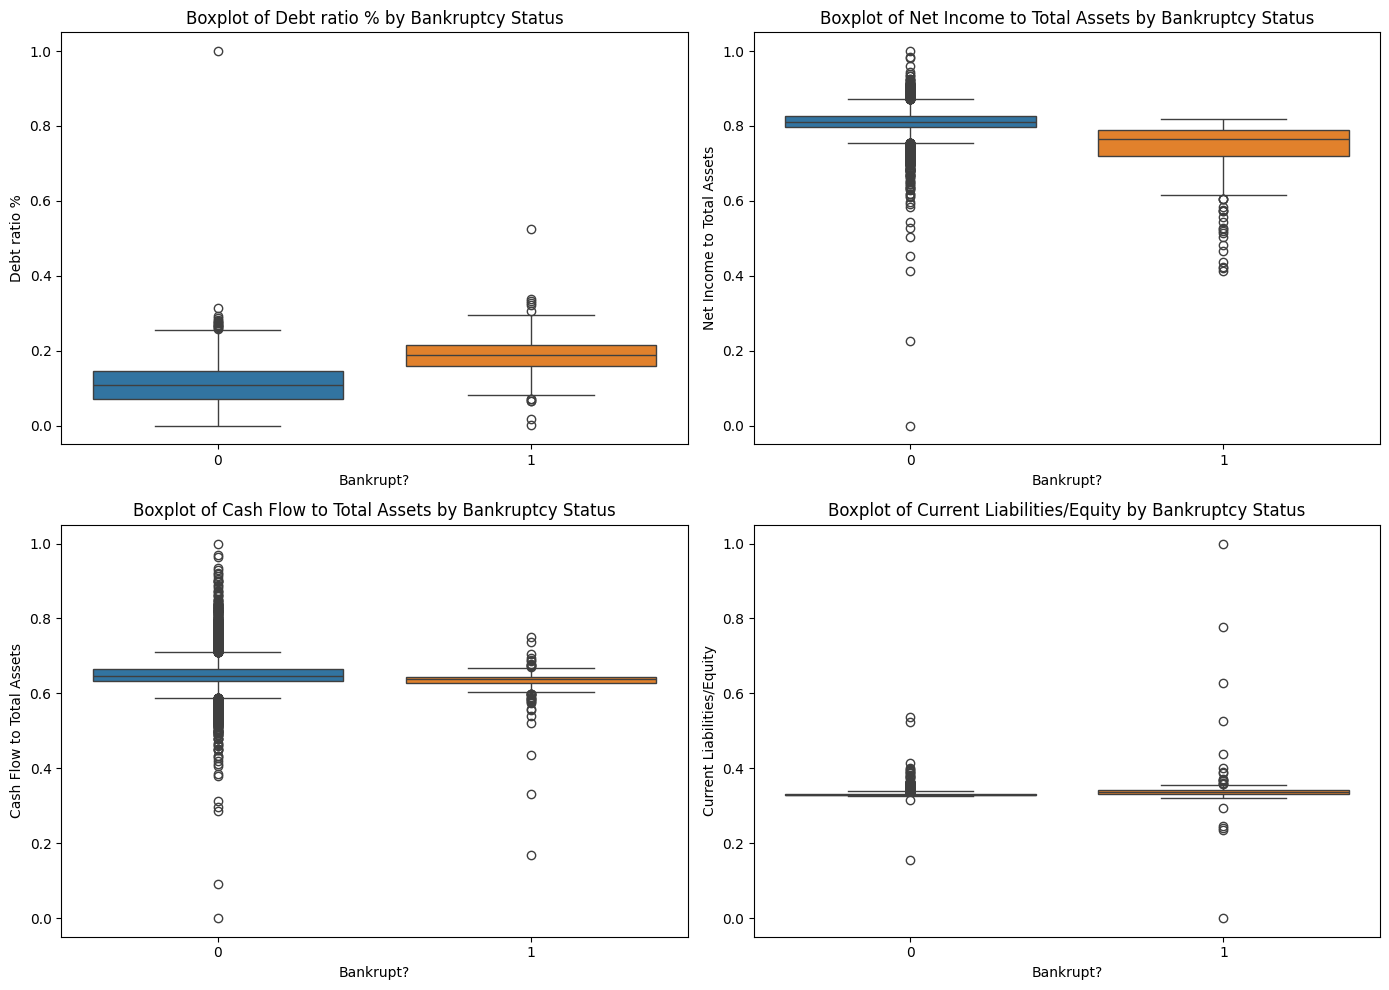

In [68]:
# Select key features
boxplot_features = ["Debt ratio %", "Net Income to Total Assets", "Cash Flow to Total Assets", "Current Liabilities/Equity"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for iteration
axes = axes.flatten()

# Generate boxplots for each feature
for i, feature in enumerate(boxplot_features):
    sns.boxplot(x=df["Bankrupt?"], y=df[feature], hue=df["Bankrupt?"], ax=axes[i], legend=False)
    axes[i].set_title(f"Boxplot of {feature} by Bankruptcy Status")

plt.tight_layout()
plt.show()

## Boxplot Analysis of Key Financial Indicators by Bankruptcy Status

1️ Debt Ratio %  
- The **Debt Ratio %** measures the proportion of a company's assets that are financed through debt. Both bankrupt (`Bankrupt? = 1`) and non-bankrupt (`Bankrupt? = 0`) companies have similar median debt levels. However, bankrupt companies show a slightly **higher interquartile range (IQR)**, suggesting greater variability in debt levels. Some extreme outliers exist, with a few companies showing **near 100% debt financing**, meaning their total liabilities are nearly equal to total assets.

2️ Net Income to Total Assets  
- This ratio represents **profitability** relative to total assets. Non-bankrupt firms have a **higher median value**, clustered around 0.8, indicating strong profitability. Bankrupt companies exhibit a **slightly lower median**, with some firms showing **negative or near-zero profitability**, which aligns with financial distress. The boxplot reveals **a significant number of outliers** in both groups, suggesting that some firms experienced unusual profitability fluctuations.

3️ Cash Flow to Total Assets  
- This indicator assesses a firm's **ability to generate cash flow relative to total assets**. The medians for bankrupt and non-bankrupt firms are similar, suggesting **cash flow alone is not a major differentiating factor** between the two groups. However, bankrupt firms exhibit **a wider range and more extreme outliers**, with some companies having significantly negative or close-to-zero cash flows. This could indicate that while some bankrupt firms had cash flow issues, others may have failed due to other financial challenges (e.g., excessive debt, poor profitability).

4️ Current Liabilities/Equity  
- This ratio highlights the **relationship between short-term liabilities and shareholder equity**. The distribution is **relatively concentrated**, with both groups showing a **narrow spread**. Bankrupt firms tend to have slightly **higher values**, meaning they relied more on short-term liabilities compared to equity. Outliers in bankrupt companies suggest that **some firms had extremely high short-term obligations relative to equity**, potentially signaling financial instability.

**Key Takeaways**
✔ **Debt Ratio % alone may not be a strong bankruptcy predictor**, as both groups share similar distributions. However, extreme debt levels could indicate higher risk.  
✔ **Net Income to Total Assets shows a clear difference**, with bankrupt firms displaying lower profitability and more variation.  
✔ **Cash Flow to Total Assets has considerable outliers**, but its median values suggest that cash flow is not the sole bankruptcy determinant.  
✔ **Current Liabilities/Equity suggests that bankrupt firms relied more on short-term liabilities**, possibly contributing to financial distress.  

These findings indicate that **a combination of multiple financial indicators** is necessary for effective bankruptcy prediction.

## Principal Component Analysis (PCA) for Dimensionality Reduction

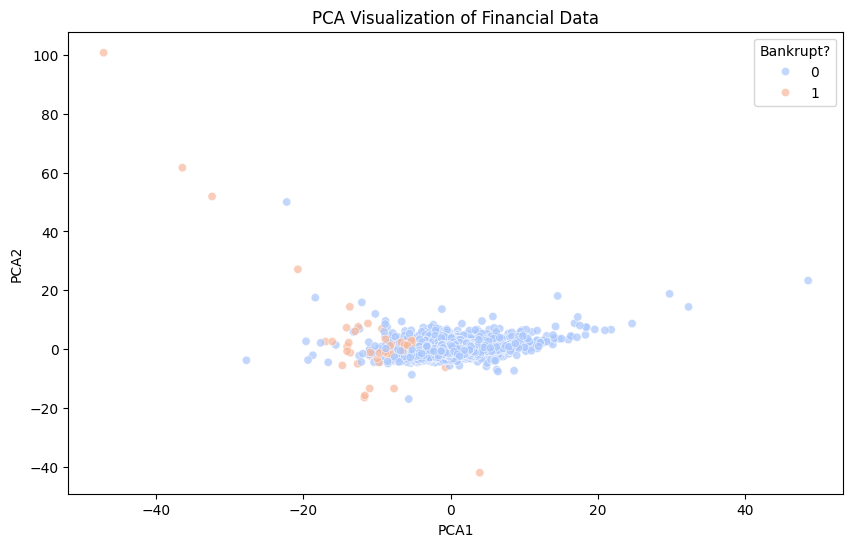

In [71]:
# Standardize features before PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Bankrupt?"]))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Convert to DataFrame
df_pca = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
df_pca["Bankrupt?"] = df["Bankrupt?"]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Bankrupt?", data=df_pca, palette="coolwarm", alpha=0.7)
plt.title("PCA Visualization of Financial Data")
plt.show()



## Principal Component Analysis (PCA)

### What is PCA?
PCA is a **dimensionality reduction technique** used to transform a dataset with many correlated variables into a **smaller set of uncorrelated variables**, called **principal components**. This transformation helps in identifying patterns and simplifying complex datasets while retaining as much variance (information) as possible.

### How does PCA work?
1. **Standardization** – The data is standardized to have a mean of 0 and a standard deviation of 1.
2. **Covariance Matrix Calculation** – This matrix captures relationships between the variables.
3. **Eigenvalues & Eigenvectors** – These represent the principal directions (new axes) of the dataset.
4. **Selection of Principal Components** – The components with the highest eigenvalues explain the most variance in the data.
5. **Projection** – The original data is projected onto the new axes (PCA1, PCA2, etc.).

### **Analysis of the PCA Scatter Plot**
- **PCA1 (x-axis)** is the first principal component, capturing the highest variance in the data.
- **PCA2 (y-axis)** is the second principal component, capturing the second highest variance.
- **Colors (blue for non-bankrupt, orange for bankrupt)** indicate the bankruptcy status of the companies.

### **Key Observations**
- **No clear separation**: The bankrupt (orange) and non-bankrupt (blue) companies **overlap significantly**, meaning these two principal components alone **do not strongly differentiate** between bankrupt and non-bankrupt firms.
- **Some outliers**: A few bankrupt firms are positioned far from the main cluster, indicating **companies with extreme financial characteristics**.
- **Most data points are concentrated** around the center, suggesting that the majority of firms have **similar financial profiles** based on these components.

PCA is useful for **reducing complexity**, but in this case, it suggests that **bankruptcy prediction may require more sophisticated modeling techniques**.


## Feature Importance Using Random Forest

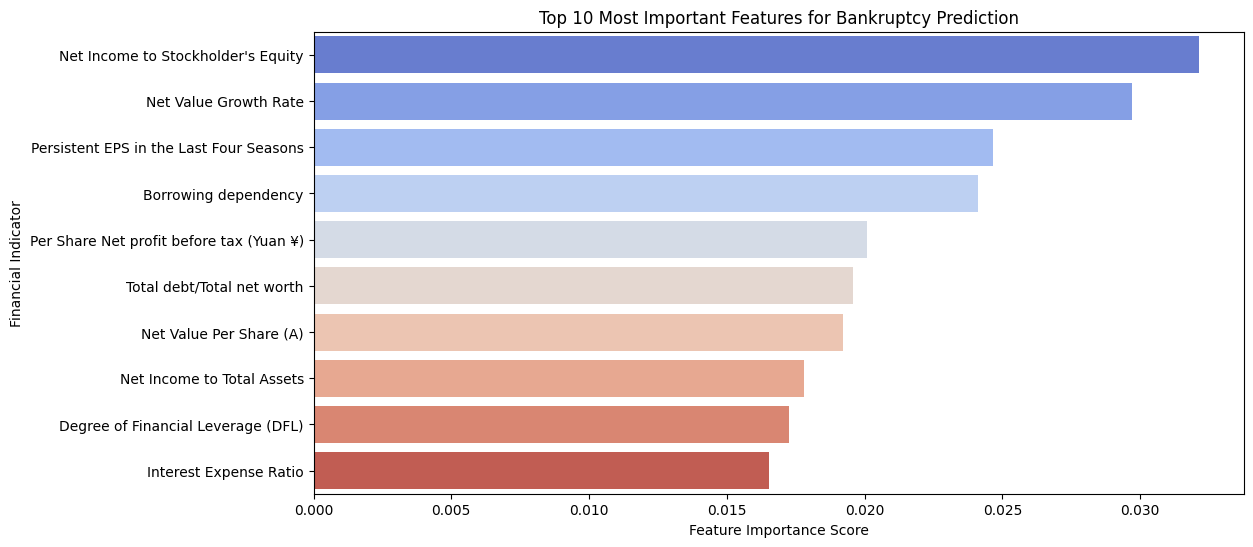

In [79]:
# Define features and target variable
X = df.drop(columns=["Bankrupt?"])
y = df["Bankrupt?"]

# Train a simple Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], hue=feature_importance.index[:10], dodge=False, legend=False, palette="coolwarm")
plt.title("Top 10 Most Important Features for Bankruptcy Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Financial Indicator")
plt.show()

### **Feature Importance Analysis Using Random Forest**

#### **Model Overview**
The **Random Forest Classifier** is used to identify the most important financial indicators for predicting bankruptcy. It works by:
1. Selecting financial features and training a **Random Forest model**.
2. Extracting the **feature importance scores** based on their contribution to reducing uncertainty.
3. Visualizing the **top 10 most important features** in a ranked **bar plot**.

#### **Key Insights from the Graph**
- **"Net Income to Stockholder’s Equity"** is the most important feature, highlighting **profitability** as a crucial factor.
- **"Borrowing dependency"** and **"Debt ratio %"** suggest that **high leverage** increases bankruptcy risk.
- **"Persistent EPS in the Last Four Seasons"** shows that companies with consistently low earnings are at higher risk.
- **Liquidity indicators** like **"Cash/Total Assets"** emphasize the role of **cash flow in financial stability**.

### **Takeaways**
- **Profitability, debt structure, and liquidity** are the strongest predictors of bankruptcy.
- The model ranks importance but does **not indicate whether the correlation is positive or negative**.
- Further analysis, such as **correlation studies or regression models**, is needed to determine directional relationships.